# Lab 1: Machine Learning and Data Acquisition

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\Users\olsso\anaconda3\envs\DT374B\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Acquire some data

Function for reading csv file:

In [2]:
def read_csv(filepath, cols, names):
    df = pd.read_csv("data/" + filepath, usecols=cols, names=names, header=None)
    df = df.drop([0], axis=0) # Remove first row (headers)
    df = df.astype('float64') # Cast data to floats
    
    return df

### Accelerometer

In [3]:
lay_acc_data = read_csv("lay/Accelerometer.csv", [2,3,4], ['ax', 'ay', 'az'])
stand_acc_data = read_csv("stand/Accelerometer.csv", [2,3,4], ['ax', 'ay', 'az'])

In [4]:
lay_acc_data

,ax,ay,az
1,-0.206381,9.268898,1.789831
2,-0.206381,9.268898,1.789831
3,-0.628116,8.959925,1.118944
4,-0.223131,9.343075,0.802792
5,0.198305,9.374182,1.044766
...,...,...,...
1274,0.497707,8.696415,1.717748
1275,0.476172,8.880961,1.382453
1276,0.476172,8.880961,1.382453
1277,0.476172,8.880961,1.382453


* Plot the accelerometer values using the the plot functions accessible for panda dataframes. Plot all accelerometer values, i.e. all samples for all components of the accelerometer vector.

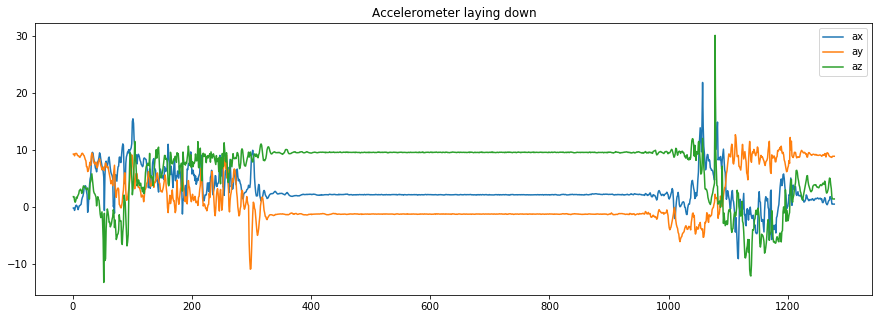

In [5]:
lay_acc_data.plot(kind = "line", title = "Accelerometer laying down", figsize=(15,5))
plt.show()

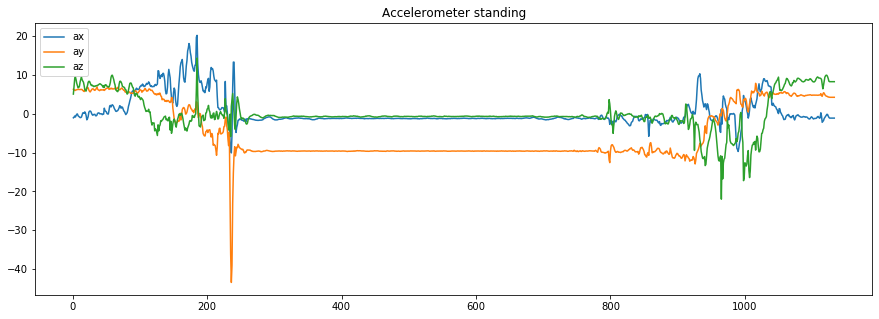

In [6]:
stand_acc_data.plot(kind = "line", title = "Accelerometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the accelerometer?<p>

    G-force. If the accelerometer is reasonably leveled one axis should show about &pm;1g and the other two axes around 0g.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the accelerometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 10. The unit is not shown in the app. The csv-file reveals the unit being milliseconds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [7]:
1 / (10 * 10**-3)

100.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 100 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Even though the phone (and hence the accelerometer) is still, the output from the three axes is different in the two plots. The reason is that the phone is positioned differently in regards to earths gravitation laying down compared to standing. Therefore, earth's gravity pulls different axes.

### Magnetometer

In [8]:
lay_mag_data = read_csv("lay/Compass.csv", [2,3,4], ['mx', 'my', 'mz'])
stand_mag_data = read_csv("stand/Compass.csv", [2,3,4], ['mx', 'my', 'mz'])

In [9]:
lay_mag_data

,mx,my,mz
1,5.868750,-26.756250,-45.525000
2,1.537500,-28.950000,-45.656250
3,-6.431250,-27.581251,-46.256252
4,-16.031250,-26.662500,-45.825000
5,-24.975000,-28.931252,-40.293750
...,...,...,...
126,7.406250,-18.562500,-52.237503
127,8.287500,-20.025002,-50.118750
128,7.500000,-19.237501,-50.118750
129,8.400001,-21.112501,-48.131252


* Plot the magnetometer values using the the plot functions accessible for panda dataframes. Plot all magnetometer values, i.e. all samples for all components of the magnetometer vector.

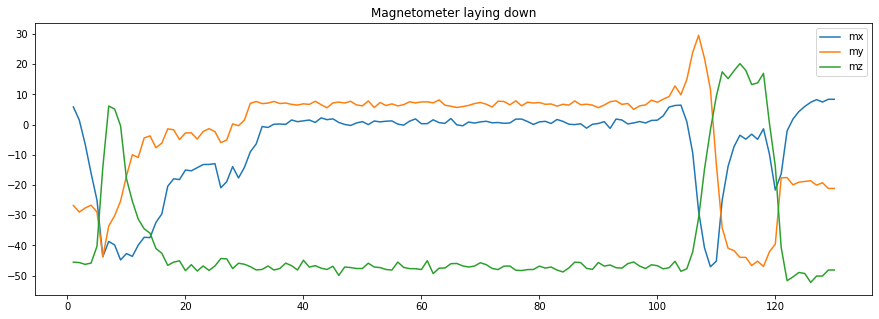

In [10]:
lay_mag_data.plot(kind = "line", title = "Magnetometer laying down", figsize=(15,5))
plt.show()

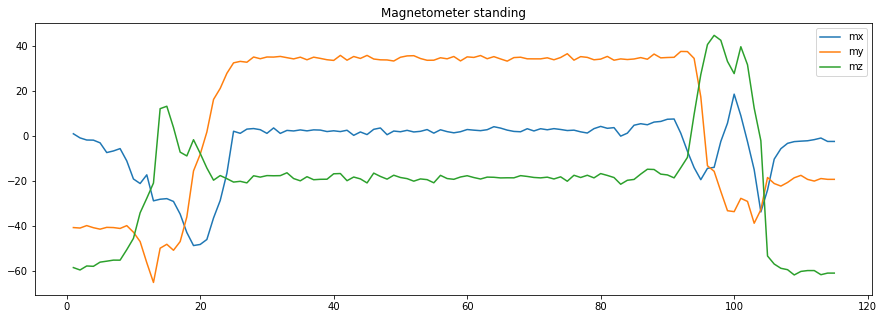

In [11]:
stand_mag_data.plot(kind = "line", title = "Magnetometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the magnetometer?<p>
    
    The force of the magnetic field around the phone.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the magnetometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 100. The unit is not shown in the app. The csv-file reveals the unit being milliseconds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [12]:
1 / (100 * 10**-3)

10.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 10 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Assuming earth's magnetic field has the largest contribution to the magnetic field around the phone and all other magnetic field components are negligible, the same reasoning should hold true for the magnetometer as for the accelerometer - the phone is positioned differently in space, thus giving different output in the three axes.

## Vector algebra

### Formulas

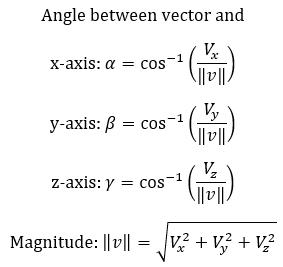

### Calculation functions

In [13]:
def calc_magnitude(df, i):
    return np.sqrt(df[df.columns[0]].iloc[i]**2 + df[df.columns[1]].iloc[i]**2 + df[df.columns[2]].iloc[i]**2)

In [14]:
def calc_angle(df, axis, i):
    return np.rad2deg(np.arccos(df[axis].iloc[i] / calc_magnitude(df, i)))

In [15]:
def calc_magnitudes(df):
    l = []
    
    for i in range(len(df)):
        l.append(calc_magnitude(df, i))
        
    return pd.DataFrame({'Magnitude': l})

In [16]:
def calc_angles(df, axis):
    l = []
    
    for i in range(len(df)):
        l.append(calc_angle(df, axis, i))
        
    return pd.DataFrame({'Angle in degrees': l})

### Calculations and plots

* Calculate the angle between the acceleration values and the z-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

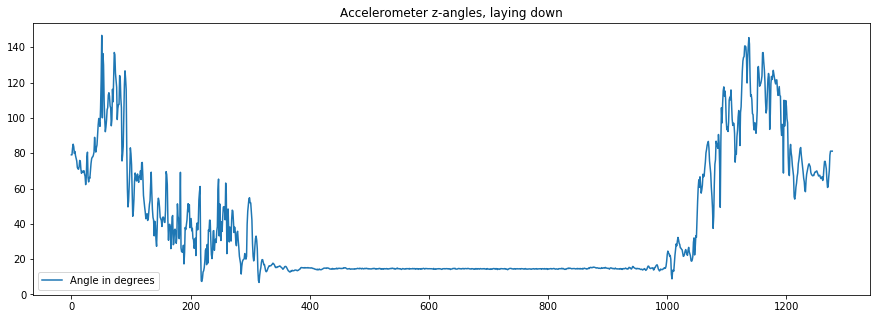

In [17]:
lay_acc_z_angles = calc_angles(lay_acc_data, lay_acc_data.columns[2])
lay_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, laying down", figsize=(15,5))
plt.show()

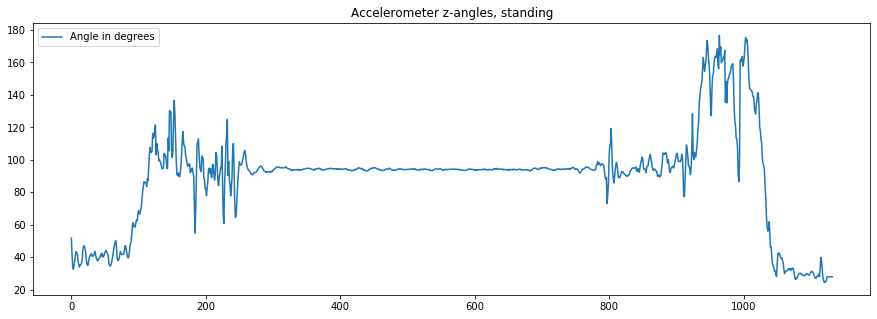

In [18]:
stand_acc_z_angles = calc_angles(stand_acc_data, stand_acc_data.columns[2])
stand_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, standing", figsize=(15,5))
plt.show()

* Calculate the angle between the magnetometer values and the y-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

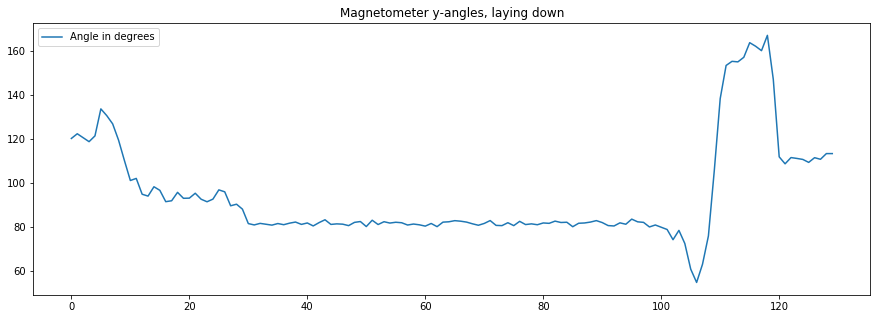

In [19]:
lay_mag_y_angles = calc_angles(lay_mag_data, lay_mag_data.columns[1])
lay_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, laying down", figsize=(15,5))
plt.show()

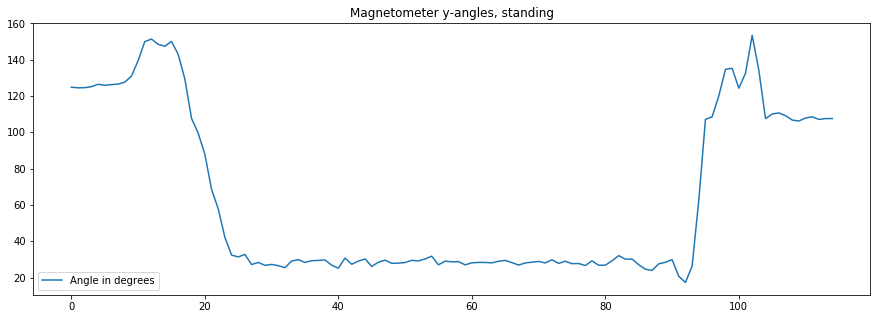

In [20]:
stand_mag_y_angles = calc_angles(stand_mag_data, stand_mag_data.columns[1])
stand_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the accelerometer data for all samples, store and plot.

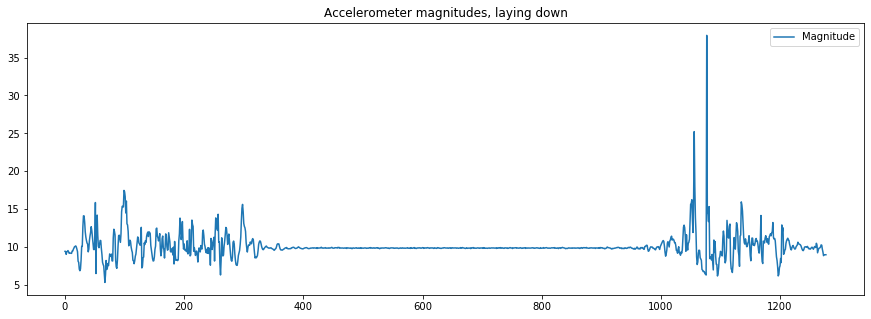

In [21]:
lay_acc_magnitudes = calc_magnitudes(lay_acc_data)
lay_acc_magnitudes.plot(kind = "line", title = "Accelerometer magnitudes, laying down", figsize=(15,5))
plt.show()

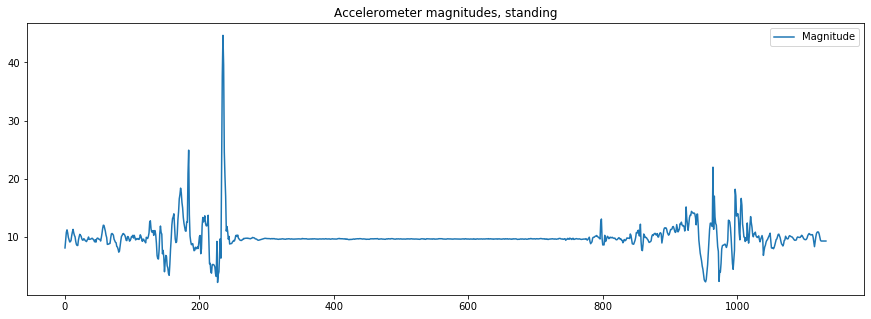

In [22]:
stand_acc_magnitudes = calc_magnitudes(stand_acc_data)
stand_acc_magnitudes.plot(kind = "line", title = "Accelerometer magnitudes, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the magnetometer data for all samples, store and plot.

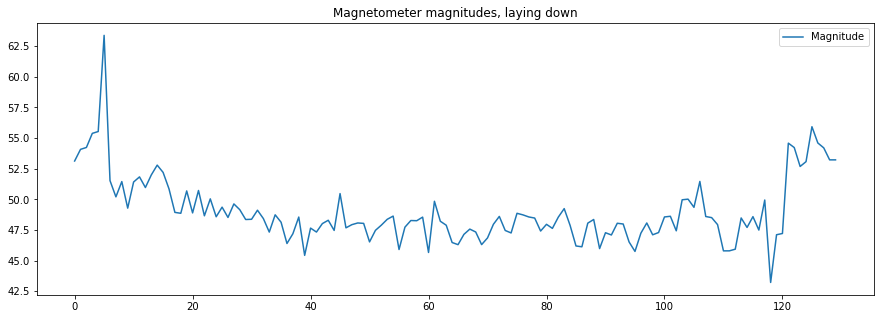

In [23]:
lay_mag_magnitudes = calc_magnitudes(lay_mag_data)
lay_mag_magnitudes.plot(kind = "line", title = "Magnetometer magnitudes, laying down", figsize=(15,5))
plt.show()

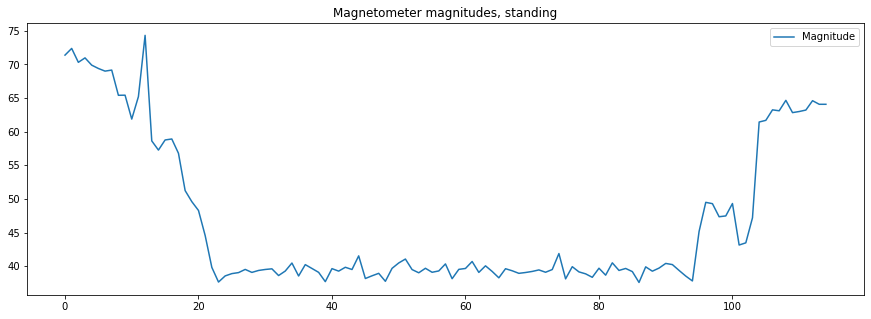

In [24]:
stand_mag_magnitudes = calc_magnitudes(stand_mag_data)
stand_mag_magnitudes.plot(kind = "line", title = "Magnetometer magnitudes, standing", figsize=(15,5))
plt.show()

## Python